I df hanno due proprietà:
*  attributi(non richiedono argomenti e le tonde) es .shape
*  funzioni richiedono argomenti ad esempio .abs()

In [1]:
### importare pandas, seaborn e matplotlib
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### IMPORT DEI DATI

I dati sono nella cartella in formato .csv, sotto il nome 'cars.csv'. Caricare il csv in DataFrame Pandas. NB. il dataset originale è disponibile qui: https://www.kaggle.com/nehalbirla/vehicle-dataset-from-cardekho?select=Car+details+v3.csv

In [3]:
### importare i dati con pd.read_csv()
df = pd.read_csv('Giulia Karanxha - cars.csv')

In [40]:
### printare le informazioni sul DataFrame con .info()
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7906 entries, 0 to 7905
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     7906 non-null   int64  
 1   Unnamed: 0.1   7906 non-null   int64  
 2   name           7906 non-null   object 
 3   year           7906 non-null   int64  
 4   selling_price  7906 non-null   int64  
 5   km_driven      7906 non-null   int64  
 6   fuel           7906 non-null   object 
 7   seller_type    7906 non-null   object 
 8   transmission   7906 non-null   object 
 9   owner          7906 non-null   object 
 10  mileage        7906 non-null   float64
 11  engine         7906 non-null   float64
 12  max_power      7906 non-null   float64
 13  torque         7906 non-null   object 
 14  seats          7906 non-null   float64
dtypes: float64(4), int64(5), object(6)
memory usage: 926.6+ KB


### TRAIN/TEST SPLIT

In [5]:
# importare train_test_split da sklearn.model_selection
from sklearn.model_selection import train_test_split

In [7]:
# Dividere il dataset in train/test set, utilizzando una test_size=0.25, shuffle=True, random_state=22
train_df, test_df = train_test_split(df, test_size=0.25, shuffle=True, random_state=22)

In [12]:
# printare la shape di train set e test set, usando l'attributo .shape dei pandas DataFrame
#train_df.shape
test_df.shape

(1977, 15)

### FEATURES & TARGET

In [23]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5929 entries, 1596 to 2933
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   km_driven  5929 non-null   int64  
 1   mileage    5929 non-null   float64
 2   max_power  5929 non-null   float64
 3   seats      5929 non-null   float64
dtypes: float64(3), int64(1)
memory usage: 231.6 KB


In [24]:
### creare X_train e X_test selezionando solo le features 'km_driven','mileage','max_power','seats'
X_train = train_df[['km_driven', 'mileage', 'max_power', 'seats']].copy() #quando seleziono più colonne devo mettere la doppia parentesi quadra
X_test = test_df[['km_driven', 'mileage', 'max_power', 'seats']].copy()

In [25]:
### creare y_train e y_test, il nome del target è 'selling_price'
y_train = train_df['selling_price'].copy()
y_test = test_df['selling_price'].copy()

### FITTING

In [26]:
### importare LinearRegression da sklearn.linear_model
from sklearn.linear_model import LinearRegression


In [28]:
### eseguire il fitting del modello sul train_df, usando la funzione .fit()

model = LinearRegression()

model = model.fit(X=X_train, y=y_train) 

### PREDICTION

In [30]:
### fare previsioni sia sul train_set che sul test_set usando la funzione .predict()
train_preds = model.predict(X_train)
test_preds = model.predict(X_test)

### EVALUATION

Controllo se le previsioni sono buone oppure no.

In [42]:
### importare mean_absolute_error e r2_score da sklearn.metrics
from sklearn.metrics import mean_absolute_error #MAE è l'errore assoluto medio, più è vicino allo 0 più è meglio
from sklearn.metrics import r2_score #r2 che va solitamente da 0 a 1 (è ok da 0.6-0.7 ad 1)

In [33]:
### calcolare MAE e R2 del modello sia sul train_set che sul test_set, e poi printarli
train_mae = mean_absolute_error(y_train, train_preds) #y_train sono i target
train_r2 = r2_score(y_train, train_preds) 
print('TRAIN SET')
print('MAE: ', train_mae)
print('R2: ', train_r2)

test_mae = mean_absolute_error(y_test, test_preds)
test_r2 = r2_score(y_test, test_preds)

print('\nTEST SET')
print('MAE: ', test_mae)
print('R2: ', test_r2)

TRAIN SET
MAE:  296603.08009248826
R2:  0.6255422508392154

TEST SET
MAE:  298338.05360203073
R2:  0.582835018856682


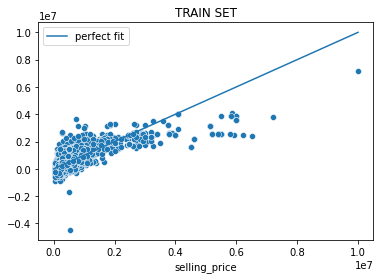

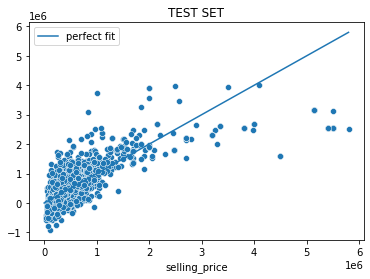

In [38]:
### fare lo scatter plot delle previsioni contro la retta di perfect fit, sia per train_set che per test_set
sns.scatterplot(x=y_train, y=train_preds) #y_train è il target dal df, train_preds è la previsione, non è necessario scrivere x ed y 

#########################
### TRAIN SET
plt.plot(range(0,y_train.max()), range(0,y_train.max()), label='perfect fit')
plt.title('TRAIN SET')
plt.legend()
plt.show()


#########################
### TEST SET

sns.scatterplot(x=y_test, y=test_preds)
plt.plot(range(0,y_test.max()), range(0,y_test.max()), label='perfect fit')
plt.title('TEST SET')
plt.legend()
plt.show()

Più è alto il corso dell'auto (selling_price), più la mia previsione è bassa, quindi sottostimo. Invece tendo a sovrastimare il costo dell'auto quando è più basso. (In base alle mie previsioni)

**L'overfitting è quando vado molto bene nel train set, ma nel test set vado peggio.**

#Sottostima e sovrastima


L'asse orizzontale corrisponde al target, mentre l'asse verticale (Y) è la previsione.
*  Quando il numero sulla retta del target corrisponde ad un numero inferiore nella retta della previsione, sto sottostimando.
*  Quando il numero della retta del target corrisponde ad un numero superiore nella retta della previsione, sto sovrastimando.
*  Tutto ciò che sta sopra la retta è sovrastima, ciò che sta sotto è sottostima

##Funzione Evaluate

In [36]:
def evaluate(targets, preds, title, plots=True, verbose=True): #prende in input target e preds
    
    mae = mean_absolute_error(targets, preds)
    r2 = r2_score(targets, preds)
    
    if verbose: #se gli ho detto di scrivere fa queste cose 
        print(title)
        print('MAE: ', mae)
        print('R2: ', r2)
    
    if plots:
        ###### previsioni VS targets
        sns.scatterplot(x=targets, y=preds)
        ###### retta di perfect fit
        plt.plot(range(0,targets.max()), range(0,targets.max()), label='perfect fit')
        plt.title(title)
        plt.legend()
        plt.show()
    
    return {'mae':mae, 'r2':r2}

TRAIN SET
MAE:  296603.08009248826
R2:  0.6255422508392154


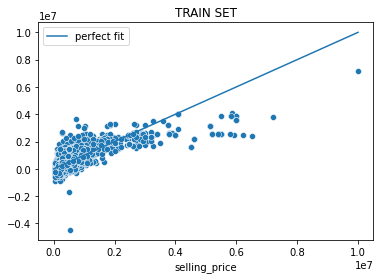

TEST SET
MAE:  298338.05360203073
R2:  0.582835018856682


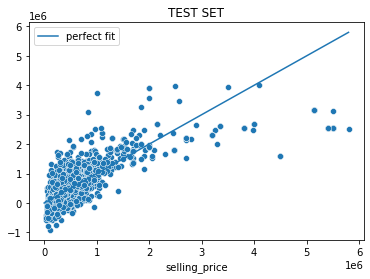

In [37]:
train_metrics = evaluate(targets=y_train, preds=train_preds, title='TRAIN SET') #in default ha verbose=True
test_metrics = evaluate(targets=y_test, preds=test_preds, title='TEST SET')